<a href="https://colab.research.google.com/github/karasu1982/POS_Data_Analytics/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定

In [ ]:
# 標準ライブラリ
import pandas as pd
import numpy as np

# データ見える化
import seaborn as sns
import matplotlib.pyplot as plt

# データ準備

ID-POSのサンプルデータとして、下記を利用

https://www.kyoritsu-pub.co.jp/book/b10003634.html

In [ ]:
%%bash
wget https://kyoritsu-pub.sakura.ne.jp/app/file/goods_contents/2319.zip
unzip /content/2319.zip
unzip /content/DataProcess.20151001/src/data/Tafeng/Tafeng.zip

Archive:  /content/2319.zip
   creating: DataProcess.20151001/
  inflating: DataProcess.20151001/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/DataProcess.20151001/
  inflating: __MACOSX/DataProcess.20151001/._.DS_Store  
  inflating: DataProcess.20151001/README.txt  
   creating: DataProcess.20151001/src/
  inflating: DataProcess.20151001/src/.DS_Store  
   creating: __MACOSX/DataProcess.20151001/src/
  inflating: __MACOSX/DataProcess.20151001/src/._.DS_Store  
  inflating: DataProcess.20151001/src/chap1.R  
  inflating: DataProcess.20151001/src/chap2.R  
  inflating: DataProcess.20151001/src/chap3.R  
  inflating: DataProcess.20151001/src/chap4.R  
  inflating: DataProcess.20151001/src/chap5.R  
  inflating: DataProcess.20151001/src/chapA.R  
  inflating: DataProcess.20151001/src/chapC.R  
   creating: DataProcess.20151001/src/data/
  inflating: DataProcess.20151001/src/data/.DS_Store  
   creating: __MACOSX/DataProcess.20151001/src/data/
  inflating: __MACOSX/DataProcess.

--2023-08-29 13:37:48--  https://kyoritsu-pub.sakura.ne.jp/app/file/goods_contents/2319.zip
Resolving kyoritsu-pub.sakura.ne.jp (kyoritsu-pub.sakura.ne.jp)... 133.167.8.28
Connecting to kyoritsu-pub.sakura.ne.jp (kyoritsu-pub.sakura.ne.jp)|133.167.8.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23615092 (23M) [application/zip]
Saving to: ‘2319.zip’

     0K .......... .......... .......... .......... ..........  0%  160K 2m24s
    50K .......... .......... .......... .......... ..........  0%  239K 2m0s
   100K .......... .......... .......... .......... ..........  0%  477K 96s
   150K .......... .......... .......... .......... ..........  0%  479K 84s
   200K .......... .......... .......... .......... ..........  1%  238K 86s
   250K .......... .......... .......... .......... ..........  1%  474K 79s
   300K .......... .......... .......... .......... ..........  1%  479K 75s
   350K .......... .......... .......... .......... ..........  1%  478K 71

In [ ]:
df = pd.read_csv("/content/Tafeng_dataset/Tafeng.csv")

# データ型を
df = df.astype({'CustID': 'object', 'ProductSubClass': 'object', 'ProductID': 'object'})

In [ ]:
df.head()

,Time,CustID,Age,Area,ProductSubClass,ProductID,Amount,Asset,SalesPrice
0,2000-11-01 00:00:00,46855,D,E,110411,4710085120468,3,51,57
1,2000-11-01 00:00:00,539166,E,E,130315,4714981010038,2,56,48
2,2000-11-01 00:00:00,663373,F,E,110217,4710265847666,1,180,135
3,2000-11-01 00:00:00,340625,A,E,110411,4710085120697,1,17,24
4,2000-11-01 00:00:00,236645,D,H,712901,8999002568972,2,128,170


# データ可視化

In [ ]:
# 列ごとの基準統計量

df.describe()

,Amount,Asset,SalesPrice
count,817741.000000,817741.000000,817741.000000
mean,1.381781,112.109848,131.875589
std,2.897473,603.661776,631.057633
min,1.000000,0.000000,1.000000
25%,1.000000,35.000000,42.000000
50%,1.000000,62.000000,76.000000
75%,1.000000,112.000000,132.000000
max,1200.000000,432000.000000,444000.000000


In [ ]:
# 列ごとのNull値数
## Null値が20%以上の項目は使わないケースが多い

df.isnull().sum()

Time               0
CustID             0
Age                0
Area               0
ProductSubClass    0
ProductID          0
Amount             0
Asset              0
SalesPrice         0
dtype: int64

<Figure size 1000x800 with 0 Axes>

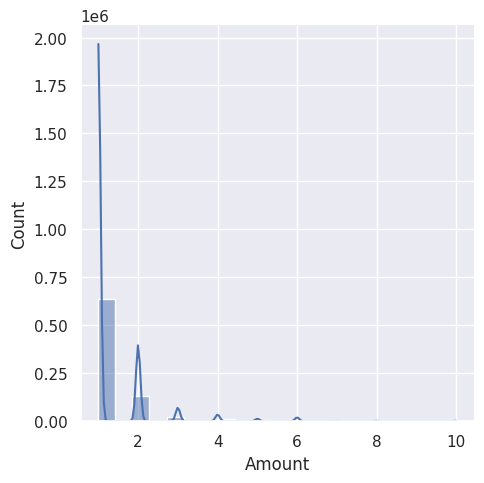

In [ ]:
# ヒストグラム

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.displot(df[df["Amount"]<=10].Amount, kde=True) # binsを指定することで、何階層に分けるか

<Axes: xlabel='Area', ylabel='SalesPrice'>

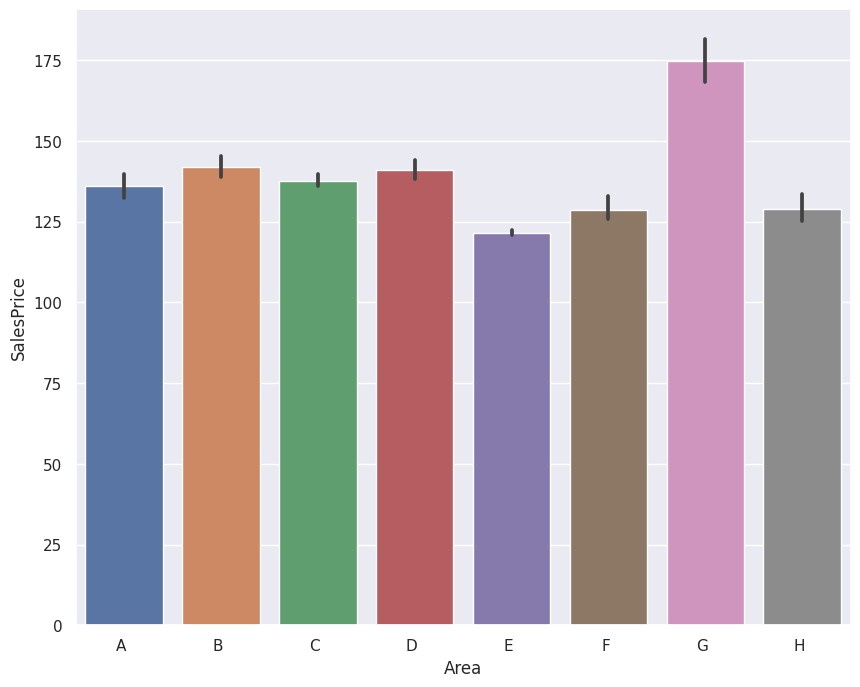

In [ ]:
# 棒グラフ
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.barplot(data=df,x="Area",y="SalesPrice", order=df["Area"].sort_values().unique()) #更に、hueで横軸を増やすことが可能

<Axes: xlabel='SalesPrice', ylabel='Amount'>

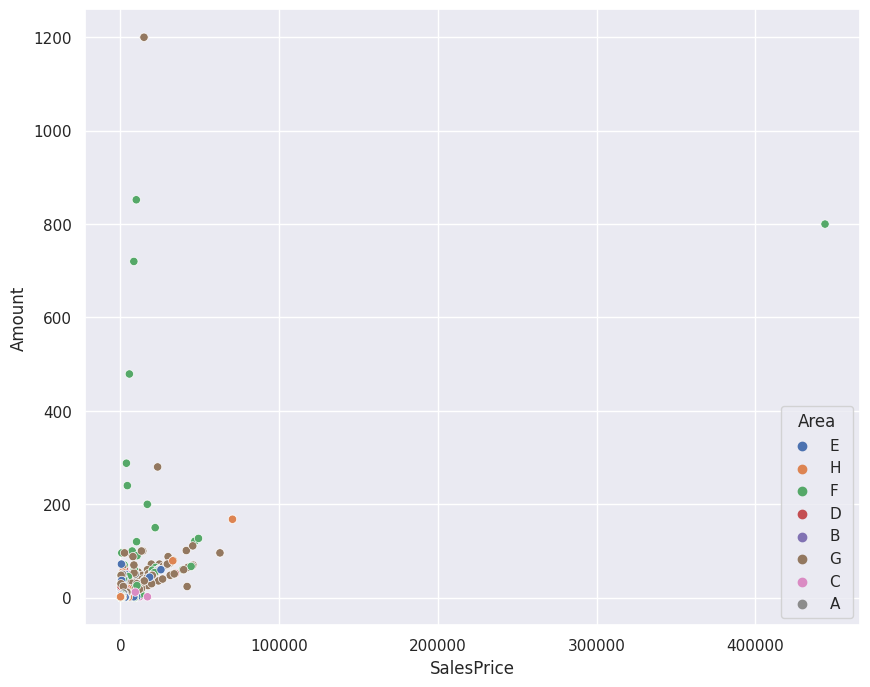

In [ ]:
# 散布図
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.scatterplot(data=df,x="SalesPrice",y="Amount", hue="Area")

<Axes: xlabel='Age', ylabel='Amount'>

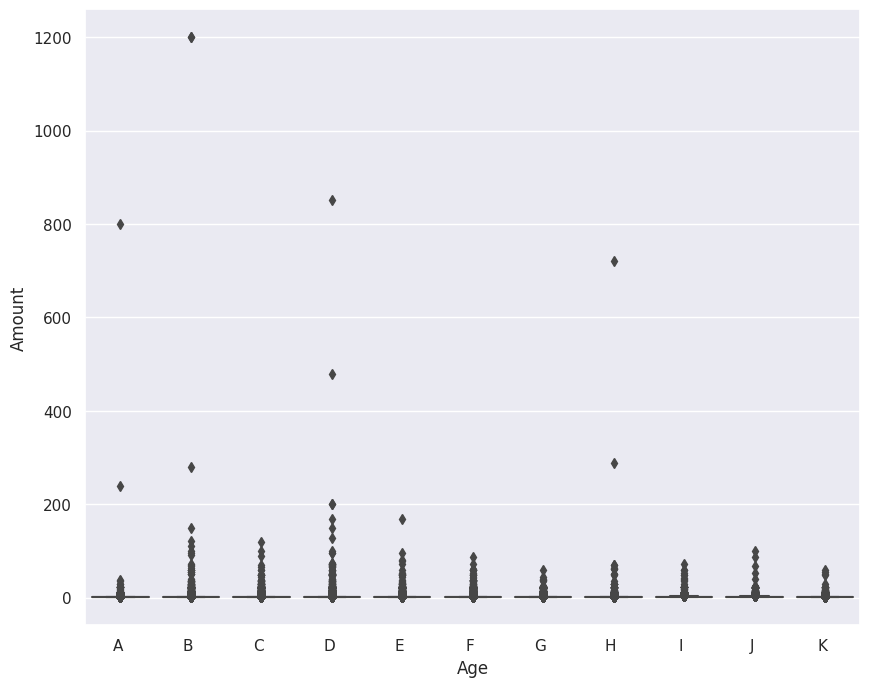

In [ ]:
# 箱ひげ図
## 四分位範囲から外れ値を発見

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(data=df, x="Age", y="Amount", order=df["Age"].sort_values().unique()) #更に、hueで横軸を増やすことが可能

<Axes: xlabel='Age', ylabel='Amount'>

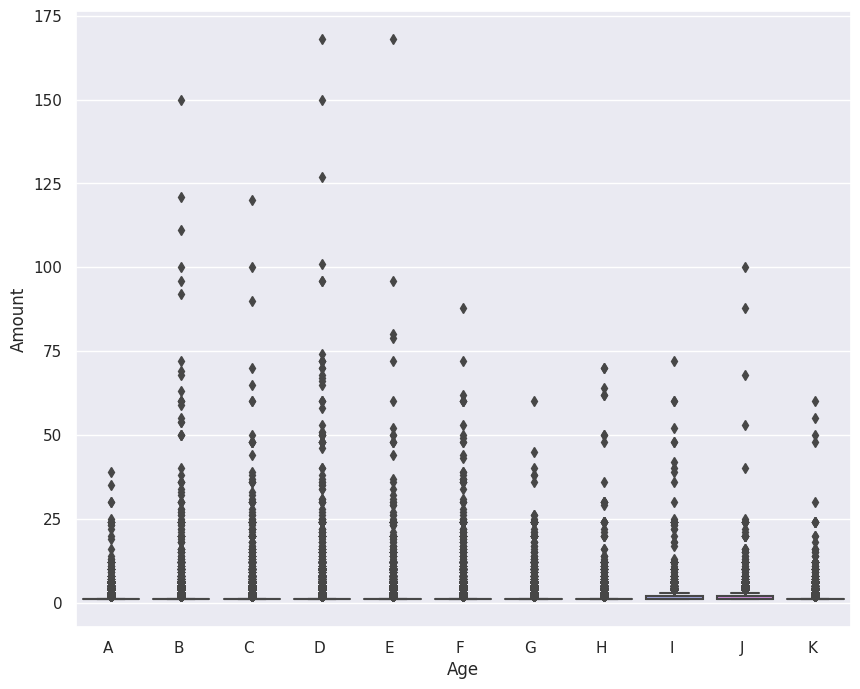

In [ ]:
# 箱ひげ図（Amountを200未満に限定）
## 四分位範囲から外れ値を発見

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(data=df[df["Amount"]<200], x="Age", y="Amount", order=df["Age"].sort_values().unique()) #更に、hueで横軸を増やすことが可能

<Axes: >

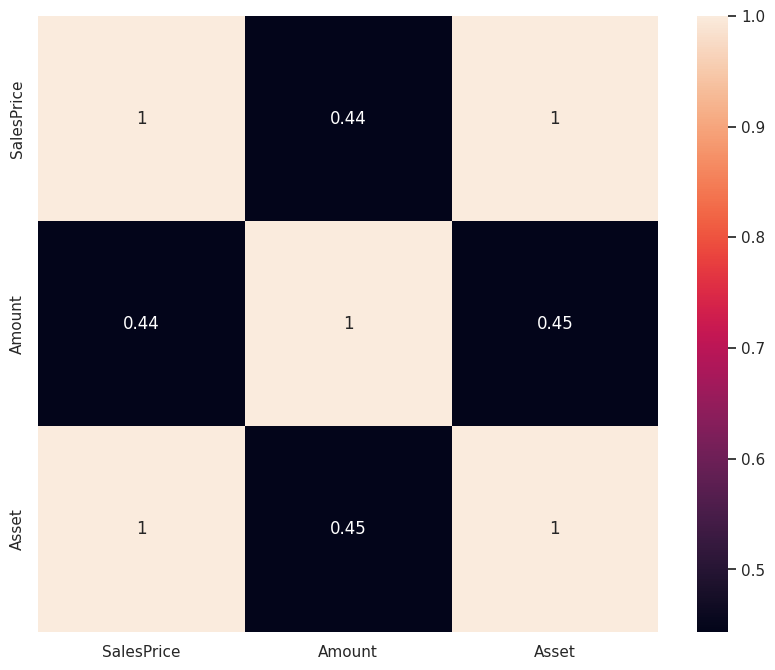

In [ ]:
# ヒートマップ、相関係数

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
sns.heatmap(df[["SalesPrice","Amount","Asset"]].corr(), annot=True) # annot=True にすると、値が表示される（項目が多いときは利用NG